<a href="https://colab.research.google.com/github/mkaushik-21/ILdata/blob/master/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

Importing the excel database as df

In [3]:
from google.colab import files
uploaded = files.upload()

Saving IL solubilities database .xlsx to IL solubilities database .xlsx


In [4]:
import io
df= pd.read_excel(io.BytesIO(uploaded['IL solubilities database .xlsx']))
df

,IL,cation,anion,x_CO2,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],[OH],CH=CH,CH=CH2,[Im13],[MIm],[MMIM],[Py],[MPy],[MPyrro],[MPip],[NH3],[NH2],[NH],[N],[P],[S],[BF4],[Cl],[DCA],[NO3],[PF6],[SCN],[TCB],[C(CN)3],[HSO4],[FSA],[Tf2N],[BETA],[FOR],[TFA],[C3F7CO2],[MeSO4],[EtSO4],[MDEGSO4],[MeSO3],[TfO],[NfO],[TDfO],[TOS],[C12PhSO3],[DMPO4],[DEPO4],[DBPO4],[methide]
0,[BMIM][BF4],[BMIM],[BF4],0.610,363.15,246.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,[BMIM][BF4],[BMIM],[BF4],0.500,383.15,235.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,[BMIM][BF4],[BMIM],[BF4],0.610,353.15,223.30,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,[BMIM][BF4],[BMIM],[BF4],0.500,373.15,198.00,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,[BMIM][BF4],[BMIM],[BF4],0.610,343.15,188.50,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10111,[HMIM][Tf2N],[HMIM],[Tf2N],0.592,298.15,35.86,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10112,[HMIM][Tf2N],[HMIM],[Tf2N],0.239,343.15,27.54,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10113,[HMIM][Tf2N],[HMIM],[Tf2N],0.396,298.15,20.15,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10114,[HMIM][Tf2N],[HMIM],[Tf2N],0.140,343.15,17.93,1,5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df.columns

Index(['IL', 'cation', 'anion', 'x_CO2', 'T (K)', 'P (bar)', '[CH3]', '[CH2]',
       '[CH]', '[OCH2]', '[OCH3]', '[CF2]', '[CF3]', '[OH]', 'CH=CH', 'CH=CH2',
       '[Im13]', '[MIm]', '[MMIM]', '[Py]', '[MPy]', '[MPyrro]', '[MPip]',
       '[NH3]', '[NH2]', '[NH]', '[N]', '[P]', '[S]', '[BF4]', '[Cl]', '[DCA]',
       '[NO3]', '[PF6]', '[SCN]', '[TCB]', '[C(CN)3]', '[HSO4]', '[FSA]',
       '[Tf2N]', '[BETA]', '[FOR]', '[TFA]', '[C3F7CO2]', '[MeSO4]', '[EtSO4]',
       '[MDEGSO4]', '[MeSO3]', '[TfO]', '[NfO]', '[TDfO]', '[TOS]',
       '[C12PhSO3]', '[DMPO4]', '[DEPO4]', '[DBPO4]', '[methide]'],
      dtype='object')

Creating a new dataset (cdf) with only the variables we will be using in regression

In [6]:
cdf = df[['T (K)', 'P (bar)', 'x_CO2']]
cdf.head(10)

,T (K),P (bar),x_CO2
0,363.15,246.0,0.610
1,383.15,235.0,0.500
2,353.15,223.3,0.610
3,373.15,198.0,0.500
4,343.15,188.5,0.610
5,382.95,185.0,0.458
6,363.15,171.0,0.500
7,333.15,162.0,0.610
8,373.15,160.0,0.458
9,357.15,154.0,0.500


Train dataset

In [7]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Graph trained pressure versus x_co2 to ensure train/test worked

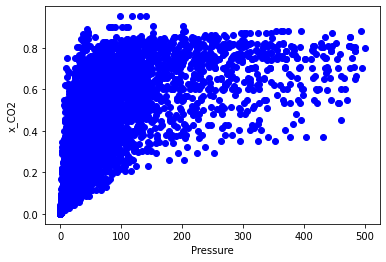

In [8]:
plt.scatter(train['P (bar)'], train['x_CO2'], color='blue')
plt.xlabel("Pressure")
plt.ylabel("x_CO2")
plt.show()

create multiple linear regression model

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['T (K)','P (bar)']])
y = np.asanyarray(train[['x_CO2']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.0013196   0.00217544]]


In [10]:
y_hat= regr.predict(test[['T (K)', 'P (bar)']])
x = np.asanyarray(test[['T (K)', 'P (bar)']])
y = np.asanyarray(test[['x_CO2']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.03
Variance score: 0.45


In [11]:
df.head()

,IL,cation,anion,x_CO2,T (K),P (bar),[CH3],[CH2],[CH],[OCH2],[OCH3],[CF2],[CF3],[OH],CH=CH,CH=CH2,[Im13],[MIm],[MMIM],[Py],[MPy],[MPyrro],[MPip],[NH3],[NH2],[NH],[N],[P],[S],[BF4],[Cl],[DCA],[NO3],[PF6],[SCN],[TCB],[C(CN)3],[HSO4],[FSA],[Tf2N],[BETA],[FOR],[TFA],[C3F7CO2],[MeSO4],[EtSO4],[MDEGSO4],[MeSO3],[TfO],[NfO],[TDfO],[TOS],[C12PhSO3],[DMPO4],[DEPO4],[DBPO4],[methide]
0,[BMIM][BF4],[BMIM],[BF4],0.61,363.15,246.0,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,[BMIM][BF4],[BMIM],[BF4],0.50,383.15,235.0,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,[BMIM][BF4],[BMIM],[BF4],0.61,353.15,223.3,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,[BMIM][BF4],[BMIM],[BF4],0.50,373.15,198.0,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,[BMIM][BF4],[BMIM],[BF4],0.61,343.15,188.5,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Create dataset pdf with each functional group corresponding to 'Gn'

In [12]:
pdf = df.rename(columns={'[CH3]': 'G1', '[CH2]': 'G2', '[CH]': 'G3', '[OCH2]': 'G4', '[OCH3]': 'G5','[CF2]': 'G6', '[CF3]': 'G7', '[OH]': 'G8', 'CH=CH': 'G9', 'CH=CH2': 'G10',
       '[Im13]': 'G11', '[MIm]': 'G12', '[MMIM]': 'G13', '[Py]': 'G14', '[MPy]': 'G15', '[MPyrro]': 'G16', '[MPip]': 'G17',
       '[NH3]': 'G18', '[NH2]': 'G19', '[NH]': 'G20', '[N]': 'G21', '[P]': 'G22', '[S]': 'G23', '[BF4]': 'G24', '[Cl]': 'G25', '[DCA]': 'G26',
       '[NO3]': 'G27', '[PF6]': 'G28', '[SCN]': 'G29', '[TCB]': 'G30', '[C(CN)3]': 'G31', '[HSO4]': 'G32', '[FSA]': 'G33',
       '[Tf2N]': 'G34', '[BETA]': 'G35', '[FOR]': 'G36', '[TFA]': 'G37', '[C3F7CO2]': 'G38', '[MeSO4]': 'G39', '[EtSO4]': 'G40',
       '[MDEGSO4]': 'G41', '[MeSO3]': 'G42', '[TfO]': 'G43', '[NfO]': 'G44', '[TDfO]': 'G45', '[TOS]': 'G46',
       '[C12PhSO3]': 'G47', '[DMPO4]': 'G48', '[DEPO4]': 'G49', '[DBPO4]': 'G50', '[methide]': 'G51' })

In [13]:
pdf.head()

,IL,cation,anion,x_CO2,T (K),P (bar),G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,G11,G12,G13,G14,G15,G16,G17,G18,G19,G20,G21,G22,G23,G24,G25,G26,G27,G28,G29,G30,G31,G32,G33,G34,G35,G36,G37,G38,G39,G40,G41,G42,G43,G44,G45,G46,G47,G48,G49,G50,G51
0,[BMIM][BF4],[BMIM],[BF4],0.61,363.15,246.0,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,[BMIM][BF4],[BMIM],[BF4],0.50,383.15,235.0,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,[BMIM][BF4],[BMIM],[BF4],0.61,353.15,223.3,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,[BMIM][BF4],[BMIM],[BF4],0.50,373.15,198.0,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,[BMIM][BF4],[BMIM],[BF4],0.61,343.15,188.5,1,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
pdf.columns

Index(['IL', 'cation', 'anion', 'x_CO2', 'T (K)', 'P (bar)', 'G1', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14',
       'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24',
       'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31', 'G32', 'G33', 'G34',
       'G35', 'G36', 'G37', 'G38', 'G39', 'G40', 'G41', 'G42', 'G43', 'G44',
       'G45', 'G46', 'G47', 'G48', 'G49', 'G50', 'G51'],
      dtype='object')

Train pdf dataset

In [15]:
msk = np.random.rand(len(df)) < 0.8
train = pdf[msk]
test = pdf[~msk]

Create linear regression model using pdf dataset


In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x1 = np.asanyarray(train[['T (K)', 'P (bar)', 'G1', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14',
       'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24',
       'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31', 'G32', 'G33', 'G34',
       'G35', 'G36', 'G37', 'G38', 'G39', 'G40', 'G41', 'G42', 'G43', 'G44',
       'G45', 'G46', 'G47', 'G48', 'G49', 'G50', 'G51']])
y1 = np.asanyarray(train[['x_CO2']])
regr.fit (x1, y1)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.00137104  0.0019874   0.01515139  0.01520806 -0.02553963 -0.03288104
   0.021967   -0.04215273  0.09232945 -0.05311896 -0.31361258 -0.11723766
   0.21860109 -0.00738404 -0.06248858  0.07391699 -0.1995907   0.00458906
  -0.08100864 -0.01777216 -0.00446698  0.66434744 -0.16891419 -0.21179697
  -0.20803231 -0.03862014 -0.09071859  0.00134457 -0.06882918 -0.05968881
  -0.07853887  0.06581801 -0.0675359   0.19122248 -0.02470615  0.07173562
   0.05041506 -0.07130164 -0.02072797  0.03218249 -0.05756959 -0.09584434
   0.03441685 -0.12575472  0.03930291  0.16175819  0.20667561  0.06569132
  -0.03821973 -0.15919143  0.03142814 -0.19527943  0.24053526]]


Check arrays to make sure format/values are normalized and correct

In [17]:
(x1,y1)

(array([[363.15, 246.  ,   1.  , ...,   0.  ,   0.  ,   0.  ],
        [353.15, 223.3 ,   1.  , ...,   0.  ,   0.  ,   0.  ],
        [373.15, 198.  ,   1.  , ...,   0.  ,   0.  ,   0.  ],
        ...,
        [343.15,  27.54,   1.  , ...,   0.  ,   0.  ,   0.  ],
        [298.15,  20.15,   1.  , ...,   0.  ,   0.  ,   0.  ],
        [343.15,  17.93,   1.  , ...,   0.  ,   0.  ,   0.  ]]),
 array([[0.61 ],
        [0.61 ],
        [0.5  ],
        ...,
        [0.239],
        [0.396],
        [0.14 ]]))

USe evaluation metrics to determine the accuracy of model

In [18]:
y1_hat= regr.predict(test[['T (K)', 'P (bar)', 'G1', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14',
       'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24',
       'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31', 'G32', 'G33', 'G34',
       'G35', 'G36', 'G37', 'G38', 'G39', 'G40', 'G41', 'G42', 'G43', 'G44',
       'G45', 'G46', 'G47', 'G48', 'G49', 'G50', 'G51']])
x1 = np.asanyarray(test[['T (K)', 'P (bar)', 'G1', 'G2', 'G3',
       'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10', 'G11', 'G12', 'G13', 'G14',
       'G15', 'G16', 'G17', 'G18', 'G19', 'G20', 'G21', 'G22', 'G23', 'G24',
       'G25', 'G26', 'G27', 'G28', 'G29', 'G30', 'G31', 'G32', 'G33', 'G34',
       'G35', 'G36', 'G37', 'G38', 'G39', 'G40', 'G41', 'G42', 'G43', 'G44',
       'G45', 'G46', 'G47', 'G48', 'G49', 'G50', 'G51']])
y1 = np.asanyarray(test[['x_CO2']])
print("Residual sum of squares: %.2f"
      % np.mean((y1_hat - y1) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x1, y1))

Residual sum of squares: 0.02
Variance score: 0.62


Compare test x_CO2 versus the actual data (compare the value for each input)

In [69]:
df1 = test[['x_CO2']]
df1

,x_CO2
1,0.500
5,0.458
8,0.458
16,0.500
18,0.458
...,...
10087,0.247
10088,0.302
10101,0.751
10109,0.583


In [70]:
df2 = pdf[['x_CO2']]
df2

,x_CO2
0,0.610
1,0.500
2,0.610
3,0.500
4,0.610
...,...
10111,0.592
10112,0.239
10113,0.396
10114,0.140
